In [1]:
#import libraries
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Task 1: Import the data set you exported in Exercise 4.9

In [2]:
#  creating a string of the path for .pkl file from main folder
path = r"C:/Users/Soni/7-7-23(Instacart Basket Analysis)"

In [3]:
#Importing pickel file
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_combined.pkl'))

**Check imported DataFrame:**

In [4]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
# check imported dataset Size
df.shape

(32404859, 33)

## Task 2: Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

**There are 2 variables which comes under PII data(First name & Last name)** 

**So we can delete this data as we donot need it for Analysis**

In [ ]:
#Drop First name column
df = df.drop(columns = ['First Name'])

In [ ]:
#Drop Last Name column
df = df.drop(columns = ['Last Name'])

In [8]:
# Check dataframe again:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## Task 3: create a “Region” column based on the “State” column from your customers data set.

In [65]:
#create region groups
Northeast = ['Rhode Island', 'Massachusetts', 'Connecticut', 'New Hampshire', 'Vermont','Maine', 'New Jersey', 'New York', 'Pennsylvania']
Midwest = ['Nebraska', 'Indiana', 'Illinois', 'Iowa','Kansas','Minnesota', 'Michigan', 'North Dakota', 'Wisconsin', 'South Dakota', 'Missouri', 'Ohio']
South = ['Alabama', 'Arkansas', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
West = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana' , 'Nevada' , 'New Mexico' , 'Oregon' , 'Utah' , 'Washington', 'Wyoming']

In [66]:
# Creating region flag Variable
df.loc[df['STATE'].isin(Northeast), 'Region'] ='Northeast'
df.loc[df['STATE'].isin(Midwest), 'Region'] ='Midwest'
df.loc[df['STATE'].isin(South), 'Region'] ='South'
df.loc[df['STATE'].isin(West), 'Region'] ='West'

In [67]:
# Check value counts
df['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

## Task 4: creating the spending flag.

In [68]:
#analyze spending habit of customers Vs. Region 
crosstab = pd.crosstab(df['Region'],df['spending_flag'], dropna = False)

In [69]:
#Exporting crosstab to Excel
crosstab.to_clipboard()

In [70]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,29258,7568067
Northeast,18617,5704119
South,40579,10751306
West,31223,8261690



**After checking Spending result in each region we can say South Region has more number of low spender than high spender customers. Same as low spender South has high number of High Spender customers also as compared to other Regions. In compare to South Northeast has less number of High Spender and Low Spender.**

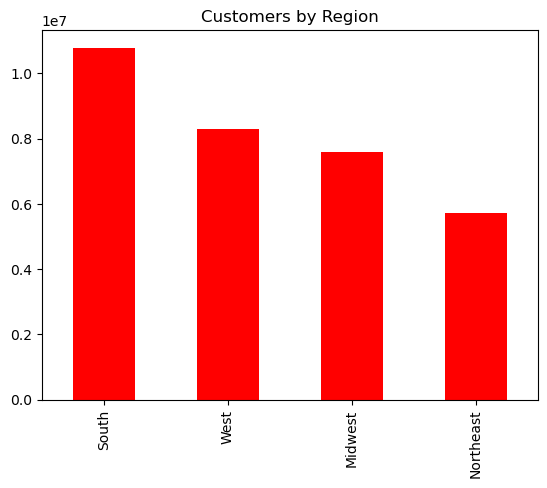

In [71]:
bar_customer_region_spender = df['Region'].value_counts().plot.bar(color = 'red', title = 'Customers by Region')

In [72]:

# Export
bar_customer_region_spender.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_region_spender.png'))

## Task 5: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [4]:
# we need to remove customers who has order less than 5 by creating exclusion flag
df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'High activity customer'

In [5]:
df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [6]:
#checking the frequency of highly active customers
df['exclusion_flag'].value_counts(dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: exclusion_flag, dtype: int64

In [7]:
# Create a dataframe of the low activity customers

df_lowActive = df[df['exclusion_flag'] == 'Low activity customer']

In [8]:
#Check the size of DataFrame
df_lowActive.shape

(1440295, 34)

In [9]:
# Check 
df_lowActive.head(50)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,family_status,income,exclusion_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,Low activity customer
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,Low activity customer
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,Low activity customer
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,Low activity customer
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,Low activity customer
1515,906054,120,2,4,7,15.0,31102,1,0,Sugar Free Energy Drink,...,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,Low activity customer
1516,3273029,120,3,2,8,19.0,31102,3,1,Sugar Free Energy Drink,...,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,Low activity customer
3855,3226575,360,1,5,12,NaN,196,1,0,Soda,...,Phyllis,Greene,Male,Arizona,46,9/1/2017,1,married,104257,Low activity customer
3856,3046940,360,2,2,8,4.0,5322,3,0,Gluten Free Dark Chocolate Chunk Chewy with a ...,...,Phyllis,Greene,Male,Arizona,46,9/1/2017,1,married,104257,Low activity customer
3857,2300993,360,3,1,13,6.0,5322,2,1,Gluten Free Dark Chocolate Chunk Chewy with a ...,...,Phyllis,Greene,Male,Arizona,46,9/1/2017,1,married,104257,Low activity customer


In [10]:
# Export this dataframe

df_lowActive.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [11]:
# Create a dataframe of the High activity customers

df_HighActive = df[df['exclusion_flag'] == 'High activity customer']

In [12]:
#Check the size of DataFrame
df_HighActive.shape

(30964564, 34)

In [13]:
df_HighActive.head(50)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,family_status,income,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,High activity customer


**Number of variables changed...**

# Export subset data
df_high_activecustomers.to_pickle(os.path.join(path, 'Data', 'dataof_high_activity_customers.pkl'))

## Task 6: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

**Customer Profiling**

**1.Customer Age Profile**

In [15]:
df['Age'].min()

18

In [16]:
df.loc[df['Age'] >= 65, 'Age_Group'] = 'Senior Citizen'
df.loc[(df['Age'] < 65) & (df['Age'] >= 30), 'Age_Group'] = 'Middle Age'
df.loc[df['Age'] < 30, 'Age_Group'] = 'Young Adults'

In [17]:
#check values
df['Age_Group'].value_counts(dropna = False)

Middle Age        17739334
Senior Citizen     8575084
Young Adults       6090441
Name: Age_Group, dtype: int64

**----Most orders made by Middle Age----**

**Customer Income Profile**

In [18]:
# income statistics:
df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [19]:
#'diving income at three levels'
df.loc[df['income'] >= 127000, 'Income_Level'] = 'Higher Income'
df.loc[(df['income'] < 127000) & (df['income'] >= 75000), 'Income_Level'] ='Middle_Level_Income'
df.loc[df['income'] < 75000, 'Income_Level'] = 'Lower income'

In [20]:
#check values
df['Income_Level'].value_counts(dropna = False)

Middle_Level_Income    13693051
Lower income           10442766
Higher Income           8269042
Name: Income_Level, dtype: int64

**----Most orders done by Middle_level_Income----**

**Dependents & Independents profile**

In [21]:
# Create profile for dependents and independents
df.loc[df['n_dependants'] == 0, 'Dependents'] = 'Independents'
df.loc[df['n_dependants'] >= 1, 'Dependents'] = 'Has dependents'


In [22]:
#check values
df['Dependents'].value_counts(dropna = False)

Has dependents    24307356
Independents       8097503
Name: Dependents, dtype: int64

**----Most orders made by family who has dependants----**

## Task 6:Create an appropriate visualization to show the distribution of profiles.

**----Distribution of orders according to Age profile-Bar Chart-----**

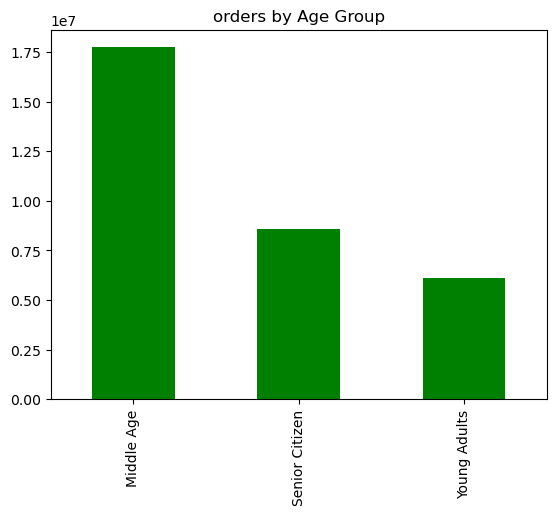

In [23]:
bar_Age_group = df['Age_Group'].value_counts().plot.bar(color = 'green', title = 'orders by Age Group')

In [24]:
#Export Age_Group bar chart as a png
bar_Age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Age_group.png'))

**---Distribution of orders according to Income_Level -  Bar Chart----**

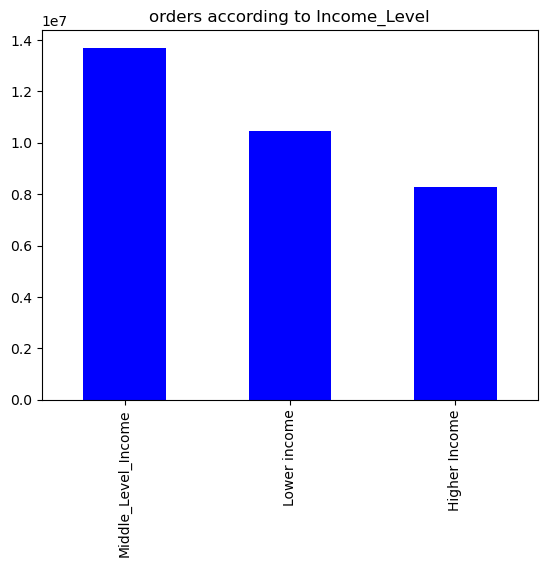

In [25]:
bar_Income_Level = df['Income_Level'].value_counts().plot.bar(color = 'blue', title = 'orders according to Income_Level')

In [26]:
#Export Age_Group bar chart as a png
bar_Income_Level.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Income_Level.png'))

**----Number of dependents in Visualization -  Bar Chart-----**

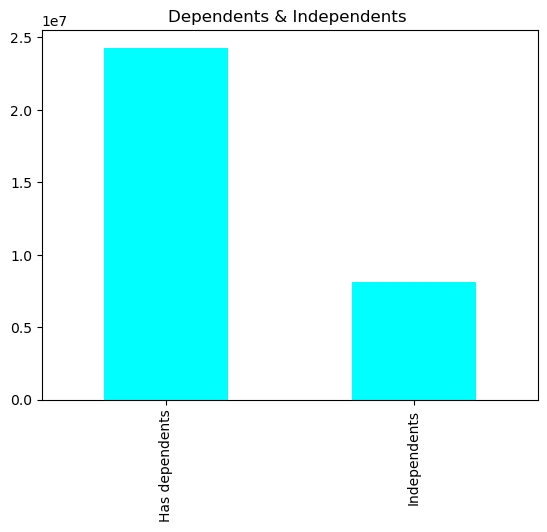

In [27]:
bar_Dependents = df['Dependents'].value_counts().plot.bar(color = 'cyan', title = 'Dependents & Independents ')

In [28]:
#Export Age_Group bar chart as a png
bar_Dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Dependents.png'))

**----Department_id Visualization-----**

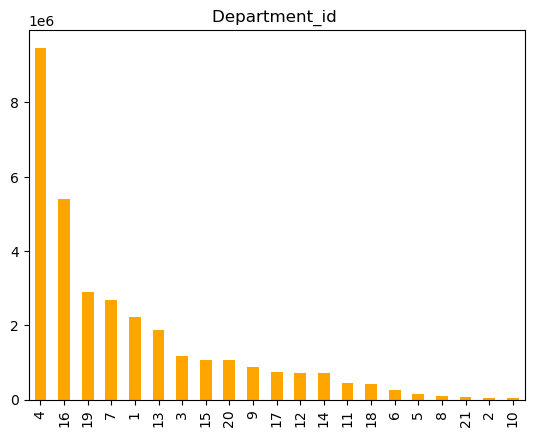

In [29]:

bar_Department_id = df['department_id'].value_counts().plot.bar(color = 'orange', title = 'Department_id ')

**--certain goods in the “department_id” profiling--**

In [30]:
#list of products with department_id from department excel file

In [31]:
# Create new variable for department names 
df.loc[df['department_id'] == 1, 'Department'] = 'frozen'
df.loc[df['department_id'] == 2, 'Department'] = 'other'
df.loc[df['department_id'] == 3, 'Department'] = 'bakery'
df.loc[df['department_id'] == 4, 'Department'] = 'produce'
df.loc[df['department_id'] == 5, 'Department'] = 'alcohol'
df.loc[df['department_id'] == 6, 'Department'] = 'international'
df.loc[df['department_id'] == 7, 'Department'] = 'beverages'
df.loc[df['department_id'] == 8, 'Department'] = 'pets'
df.loc[df['department_id'] == 9, 'Department'] = 'dry goods'
df.loc[df['department_id'] == 10, 'Department'] = 'bulk'
df.loc[df['department_id'] == 11, 'Department'] = 'personal care'
df.loc[df['department_id'] == 12, 'Department'] = 'meat/seafood'
df.loc[df['department_id'] == 13, 'Department'] = 'pantry'
df.loc[df['department_id'] == 14, 'Department'] = 'breakfast'
df.loc[df['department_id'] == 15, 'Department'] = 'canned goods'
df.loc[df['department_id'] == 16, 'Department'] = 'dairy'
df.loc[df['department_id'] == 17, 'Department'] = 'household'
df.loc[df['department_id'] == 18, 'Department'] = 'babies'
df.loc[df['department_id'] == 19, 'Department'] = 'snacks'
df.loc[df['department_id'] == 20, 'Department'] = 'deli'
df.loc[df['department_id'] == 21, 'Department'] = 'missing'

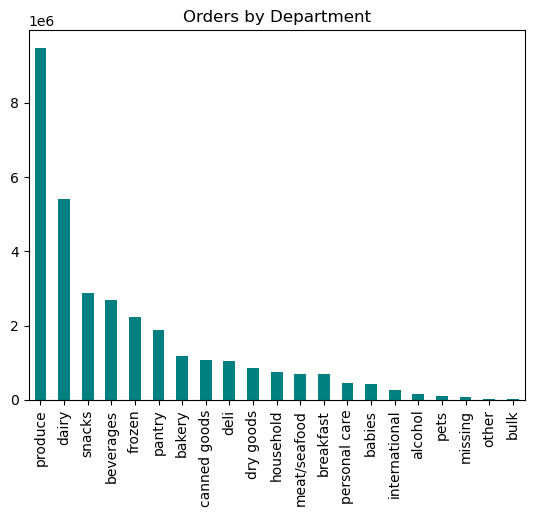

In [32]:
bar_depart_orders = df['Department'].value_counts().plot.bar(color = 'teal', title = 'Orders by Department')

**1. GROUP Visualization of department and Age_Group**

**2. GROUP Visualization of department and income**

**3. GROUP Visualization of department and dependents**


**-----GROUP Visualization of department and Age_Group-----**

In [33]:
#Grouping department and age
Department_Age = df.groupby(['Department', 'Age_Group']).size().unstack(fill_value = 0)


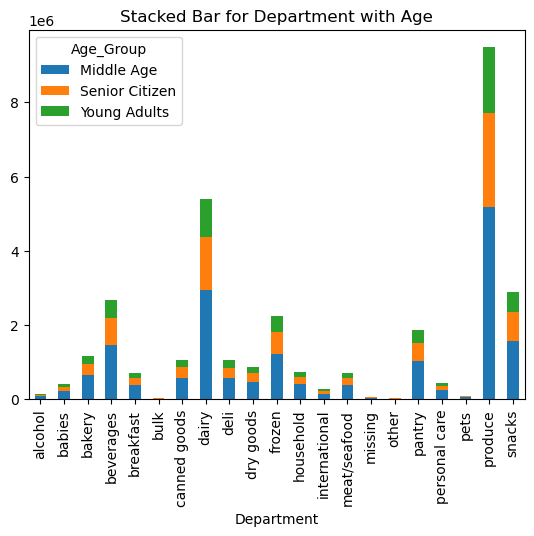

In [34]:
# Plot grouped data as stacked bar chart
bar_Department_Age = Department_Age.plot.bar(stacked = True, title = 'Stacked Bar for Department with Age')


In [35]:
# Export
bar_Department_Age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Department_Age.png'))

**-----GROUP Visualization of department and income_Level-----**

In [36]:
#Grouping department and Income_Level
Department_income = df.groupby(['Department', 'Income_Level']).size().unstack(fill_value = 0)


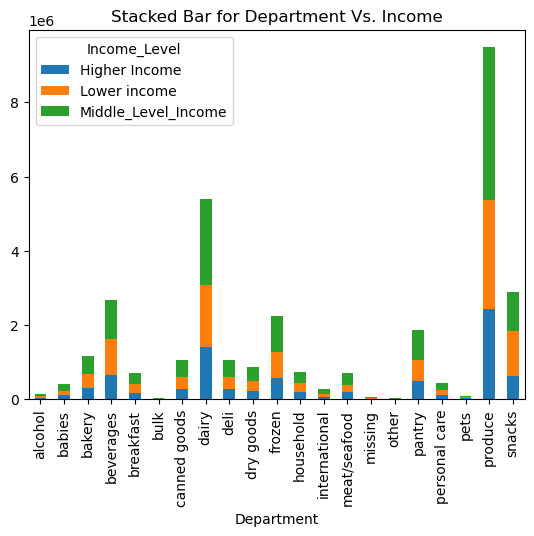

In [37]:
# Plot grouped data as stacked bar chart
bar_Department_income = Department_income.plot.bar(stacked = True, title = 'Stacked Bar for Department Vs. Income')

In [38]:
# Export
bar_Department_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Department_income.png'))

**-----GROUP Visualization of department and Dependents-----**

In [39]:
#Grouping department and Income_Level
Department_Dependents = df.groupby(['Department', 'Dependents']).size().unstack(fill_value = 0)

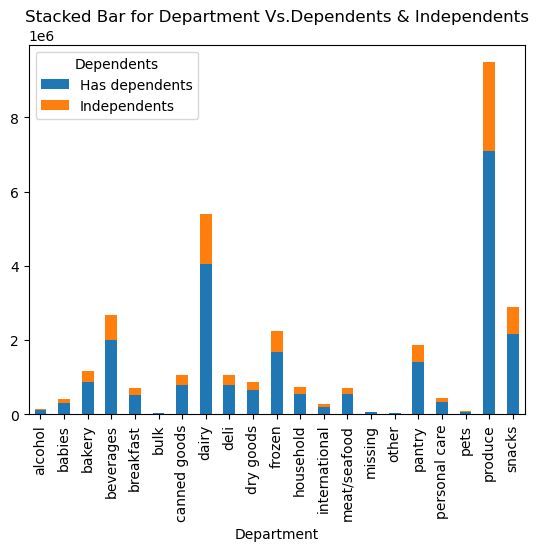

In [40]:
# Plot grouped data as stacked bar chart
bar_Department_Dependents = Department_Dependents.plot.bar(stacked = True, title = 'Stacked Bar for Department Vs.Dependents & Independents')

In [41]:
# Export
bar_Department_Dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Department_Depenents.png'))

**---profile “Single adult” or “Young parent----”**

In [42]:
#Customer family family_status
df['family_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: family_status, dtype: int64

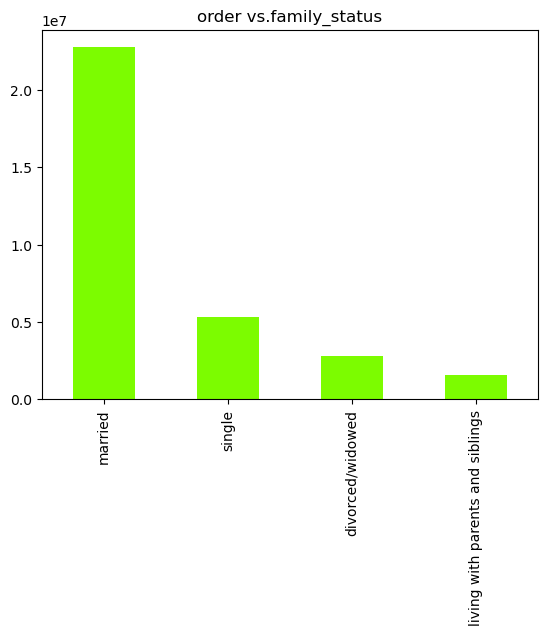

In [43]:
#family bar chart
bar_family_status = df['family_status'].value_counts().plot.bar(color = 'lawngreen', title = 'order vs.family_status')

## Task 7:Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [44]:
# age and usage frequency aggregations
df.groupby('Age_Group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
Age_Group                                       
Middle Age                  11.113244  0.0  30.0
Senior Citizen              11.078641  0.0  30.0
Young Adults                11.113200  0.0  30.0

In [45]:
# Income level and usage frequency aggregation
df.groupby('Income_Level').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                      mean  min   max
Income_Level                                         
Higher Income                    11.023142  0.0  30.0
Lower income                     11.240514  0.0  30.0
Middle_Level_Income              11.049344  0.0  30.0

In [46]:
# Income level and usage frequency aggregation
df.groupby('Dependents').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
Dependents                                      
Has dependents              11.111834  0.0  30.0
Independents                11.080805  0.0  30.0

In [47]:
# age and spending aggregations
df.groupby('Age_Group').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
Age_Group                          
Middle Age      7.790954  1.0  25.0
Senior Citizen  7.796512  1.0  25.0
Young Adults    7.783186  1.0  25.0

In [48]:
# Income and spending aggregations
df.groupby('Income_Level').agg({'prices': ['mean', 'min', 'max']})

prices           
                         mean  min   max
Income_Level                            
Higher Income        7.956666  1.0  25.0
Lower income         7.434729  1.0  25.0
Middle_Level_Income  7.962577  1.0  25.0

In [49]:
# Dependents and spending aggregations
df.groupby('Dependents').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
Dependents                         
Has dependents  7.791300  1.0  25.0
Independents    7.789957  1.0  25.0

## Task 8: Compare your customer profiles with regions and departments. Can you identify a link between them? 

In [75]:
#Grouping customer profiles with regions
Age_Region = df.groupby(['Region', 'Age_Group']).size().unstack(fill_value=0)

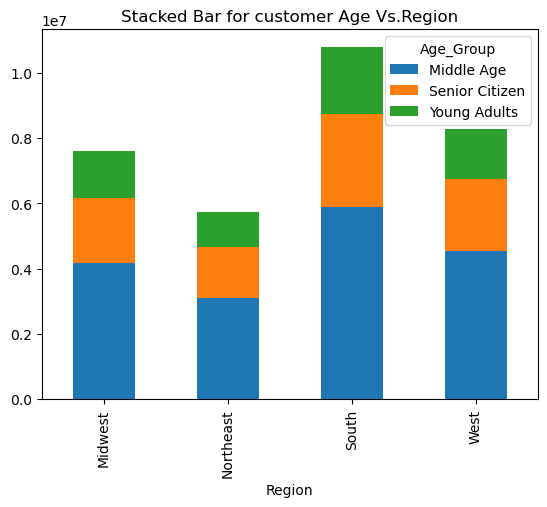

In [76]:
# Plot grouped data as stacked bar chart
bar_Age_Region = Age_Region.plot.bar(stacked = True, title = 'Stacked Bar for customer Age Vs.Region')

In [77]:
# Export
bar_Age_Region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Age_Region.png'))

In [ ]:
####Income_Region = df.groupby(['Region', 'Income_Level']).size().unstack(fill_value = 0)

In [78]:
#Grouping customer profiles with regions
Income_Region = df.groupby(['Region', 'Income_Level']).size().unstack(fill_value = 0)

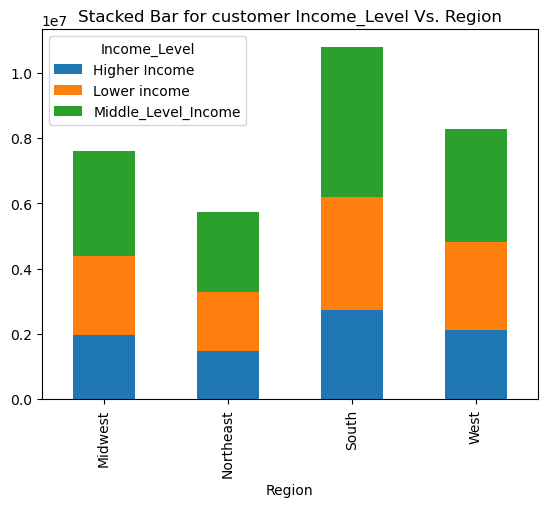

In [79]:
# Plot grouped data as stacked bar chart
bar_Income_Region = Income_Region.plot.bar(stacked = True, title = 'Stacked Bar for customer Income_Level Vs. Region')

In [ ]:
#Export
# Export
bar_Income_Region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Income_Region.png'))

In [80]:
#Grouping customer profiles with regions
Dependents_Region = df.groupby(['Region', 'Dependents']).size().unstack(fill_value = 0)

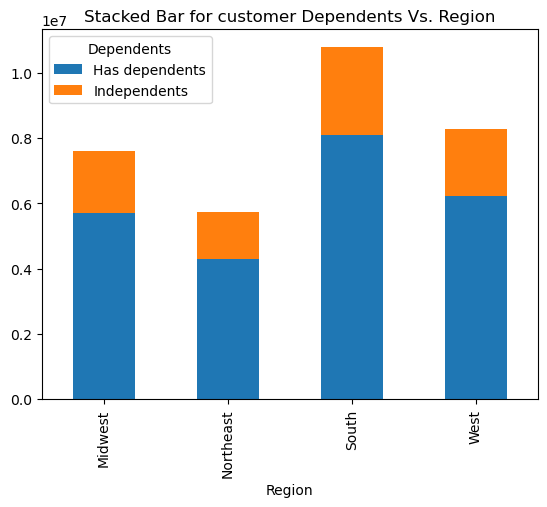

In [81]:
# Plot grouped data as stacked bar chart
bar_Dependents_Region = Dependents_Region.plot.bar(stacked = True, title = 'Stacked Bar for customer Dependents Vs. Region')

In [82]:

# Export
bar_Dependents_Region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Dependents_Region.png'))